In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

LEVEL = 51
SEED = 1584353120

In [2]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
total_students = df.shape[0]

# Min number of points to pass, can be changed

students_passing_all_subjects = df[(df['math score'] > LEVEL) &
                                (df['writing score'] > LEVEL) & 
                                (df['reading score'] > LEVEL)].shape[0]

def result_of_exam( math, writing, reading):
  if(math > LEVEL and writing > LEVEL and reading > LEVEL):
    return 'P'
  else:
    return 'F'

df["Pass/Fail"] = df.apply(lambda x: result_of_exam(x['math score'],
                                                    x['writing score'],
                                                    x['reading score']), axis=1)  

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [6]:
df.shape

(1000, 9)

In [7]:
y=df['Pass/Fail']
lb=LabelEncoder()
y = lb.fit_transform(y)
X=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course', 'Pass/Fail']]

In [8]:
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=SEED)

def encode_features(df_train, df_test):
  features = ['gender', 'race/ethnicity', 'parental level of education',
              'lunch', 'test preparation course', 'Pass/Fail']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_combined[feature])
    df_train[feature] = le.transform(df_train[feature])
    df_test[feature] = le.transform(df_test[feature])
  return df_train, df_test

X_train, X_test = encode_features(X_train, X_test)
#feature importances for better visualization
X_fin = pd.concat([X_train, X_test])

y=X_fin.iloc[:,-1] 
X_fin = X_fin.drop('Pass/Fail', axis=1)
X_train=X_train.drop('Pass/Fail', axis=1)
X_test=X_test.drop('Pass/Fail', axis=1)
X_fin.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
598,0,3,2,1,1
689,1,4,4,0,1
123,1,3,2,0,1
756,1,3,4,1,1
694,0,2,5,1,1


In [9]:
# Simple function for visualization
def plot_model(history):
    # summarize history for accuracy
    #plt.subplots(1, 2, figsize=(5, 5))
    fig = plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
def print_scores(y_test, predictions):
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f_score = f1_score(y_test, predictions)

    print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
            acc, precision, recall, f_score))
    figure(figsize=(6, 2))
    sns.heatmap(cm, annot=True, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[How to split datasets?](https://www.youtube.com/watch?v=M3qpIzy4MQk)

In [46]:
# Shallow model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.3)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 0.5916 - accuracy: 0.7628 - val_loss: 0.5304 - val_accuracy: 0.8057
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5501 - accuracy: 0.7669 - val_loss: 0.5142 - val_accuracy: 0.8057
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.7669 - val_loss: 0.5046 - val_accuracy: 0.8057
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5252 - accuracy: 0.7669 - val_loss: 0.4974 - val_accuracy: 0.8057
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7669 - val_loss: 0.4934 - val_accuracy: 0.8057
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5117 - accuracy: 0.7669 - val_loss: 0.4852 - val_accuracy: 0.8057
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5069 - accuracy: 0.7669 - val_loss: 0.4791 - val_accuracy: 0.8057
Epoch 8/100
8/8 [=========

Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7832 - val_loss: 0.4507 - val_accuracy: 0.8009
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.7832 - val_loss: 0.4511 - val_accuracy: 0.7962
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.7894 - val_loss: 0.4513 - val_accuracy: 0.8009
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.7832 - val_loss: 0.4543 - val_accuracy: 0.7962
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.7832 - val_loss: 0.4531 - val_accuracy: 0.8009
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.7873 - val_loss: 0.4527 - val_accuracy: 0.7962
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.7873 - val_loss: 0.4519 - val_accuracy: 0.7962
Epoch 66/100
8/8 [==

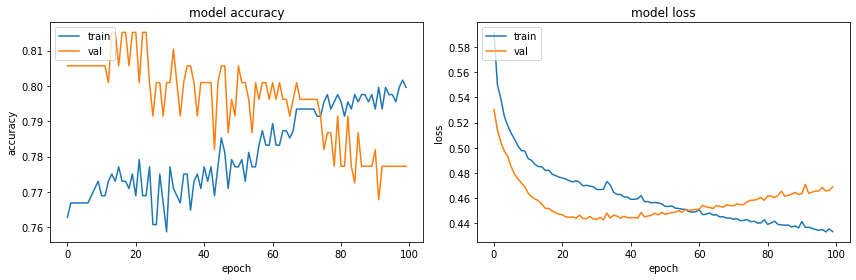

Accuracy: 0.76
Precision: 0.7877697841726619
Recall: 0.9439655172413793
F1_score: 0.8588235294117647


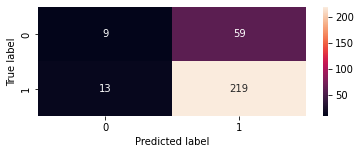

'Accuracy: 0.7733333333333333\nPrecision: 0.7867132867132867\nRecall: 0.9698275862068966\nF1_score: 0.8687258687258687'

In [47]:
plot_model(history)
print_scores(y_test, predictions)

In [50]:
# A deeper model

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, shuffle=True, validation_split=0.3)
predictions = model.predict(X_test) > 0.5

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 0.6459 - accuracy: 0.7669 - val_loss: 0.6155 - val_accuracy: 0.8057
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6094 - accuracy: 0.7669 - val_loss: 0.5729 - val_accuracy: 0.8057
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5722 - accuracy: 0.7669 - val_loss: 0.5366 - val_accuracy: 0.8057
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5482 - accuracy: 0.7669 - val_loss: 0.5137 - val_accuracy: 0.8057
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7669 - val_loss: 0.5036 - val_accuracy: 0.8057
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5264 - accuracy: 0.7669 - val_loss: 0.4981 - val_accuracy: 0.8057
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5202 - accuracy: 0.7669 - val_loss: 0.4938 - val_accuracy: 0.8057
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.4548 - accuracy: 0.7751 - val_loss: 0.4541 - val_accuracy: 0.7867
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4488 - accuracy: 0.7751 - val_loss: 0.4549 - val_accuracy: 0.7867
Epoch 61/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4493 - accuracy: 0.7751 - val_loss: 0.4549 - val_accuracy: 0.8057
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.7853 - val_loss: 0.4526 - val_accuracy: 0.7915
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4458 - accuracy: 0.7751 - val_loss: 0.4514 - val_accuracy: 0.7915
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.7832 - val_loss: 0.4526 - val_accuracy: 0.7915
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4442 - accuracy: 0.7853 - val_loss: 0.4547 - val_accuracy: 0.7820
Epoch 66/100
8/8 [===============

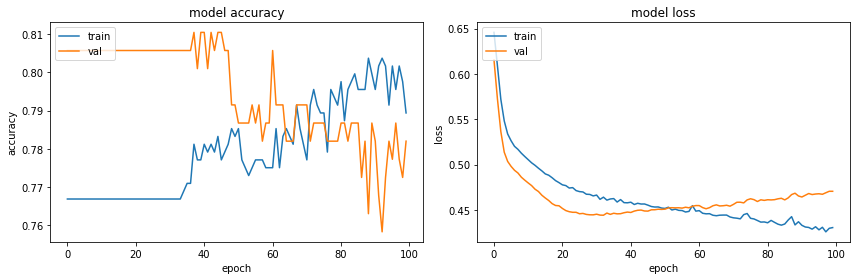

Accuracy: 0.7666666666666667
Precision: 0.7832167832167832
Recall: 0.9655172413793104
F1_score: 0.8648648648648648


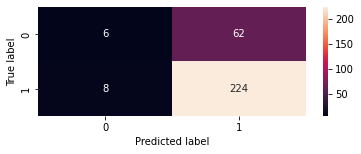

'Accuracy: 0.7866666666666666\nPrecision: 0.8\nRecall: 0.9655172413793104\nF1_score: 0.8750000000000001'

In [51]:
plot_model(history)
print_scores(y_test, predictions)

[Dropout](https://www.example.com)

In [52]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=5))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=80, batch_size=64, shuffle=True, validation_split=0.3) # 
predictions = model.predict(X_test) > 0.5

Epoch 1/80
8/8 [==============================] - 1s 21ms/step - loss: 0.6349 - accuracy: 0.7239 - val_loss: 0.5622 - val_accuracy: 0.8057
Epoch 2/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5655 - accuracy: 0.7669 - val_loss: 0.5090 - val_accuracy: 0.8057
Epoch 3/80
8/8 [==============================] - 0s 7ms/step - loss: 0.5661 - accuracy: 0.7669 - val_loss: 0.4984 - val_accuracy: 0.8057
Epoch 4/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5357 - accuracy: 0.7669 - val_loss: 0.4982 - val_accuracy: 0.8057
Epoch 5/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5226 - accuracy: 0.7669 - val_loss: 0.4903 - val_accuracy: 0.8057
Epoch 6/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5317 - accuracy: 0.7669 - val_loss: 0.4840 - val_accuracy: 0.8057
Epoch 7/80
8/8 [==============================] - 0s 6ms/step - loss: 0.5175 - accuracy: 0.7669 - val_loss: 0.4765 - val_accuracy: 0.8057
Epoch 8/80
8/8 [=================

Epoch 60/80
8/8 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.7689 - val_loss: 0.4694 - val_accuracy: 0.7820
Epoch 61/80
8/8 [==============================] - 0s 8ms/step - loss: 0.4488 - accuracy: 0.7812 - val_loss: 0.4699 - val_accuracy: 0.7820
Epoch 62/80
8/8 [==============================] - 0s 7ms/step - loss: 0.4492 - accuracy: 0.7751 - val_loss: 0.4760 - val_accuracy: 0.7820
Epoch 63/80
8/8 [==============================] - 0s 8ms/step - loss: 0.4487 - accuracy: 0.7730 - val_loss: 0.4741 - val_accuracy: 0.7867
Epoch 64/80
8/8 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.7853 - val_loss: 0.4744 - val_accuracy: 0.8009
Epoch 65/80
8/8 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.7730 - val_loss: 0.4715 - val_accuracy: 0.8057
Epoch 66/80
8/8 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.7771 - val_loss: 0.4743 - val_accuracy: 0.7867
Epoch 67/80
8/8 [==========

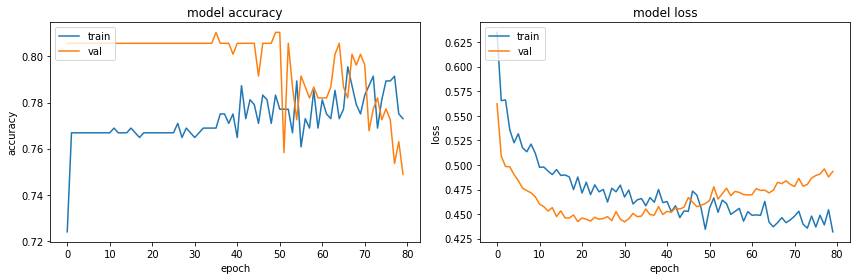

Accuracy: 0.76
Precision: 0.7985074626865671
Recall: 0.9224137931034483
F1_score: 0.856


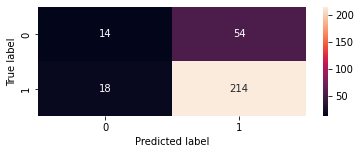

In [53]:
plot_model(history)
print_scores(y_test, predictions)

[Backpropagation](https://www.youtube.com/watch?v=yXcQ4B-YSjQ)
[Stochastic Gradient Descent]()